# Import Libs

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Dataset Import

In [25]:
df  = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# About the Dataset

In [26]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Sweet description of our dataset

In [27]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [28]:
df.shape

(5110, 12)

In [29]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We have 201 null values in the bmi column so we can get rid of them by replacing the null value with the mean

In [30]:
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean

28.893236911794673

In [31]:
df.isnull().sum().sum()

0

We dont need the column id so we just remove it

In [32]:
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# Visualization to understand the data

##Visualizing age using displot

<AxesSubplot:xlabel='Density', ylabel='age'>

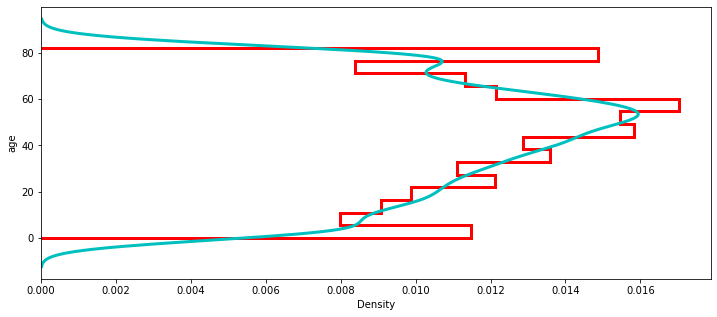

In [33]:
plt.figure(figsize=(12,5))
sns.distplot(df['age'], bins=15,vertical=True,kde_kws={"color": "c", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "r"})

##No stroke vs stroke by age

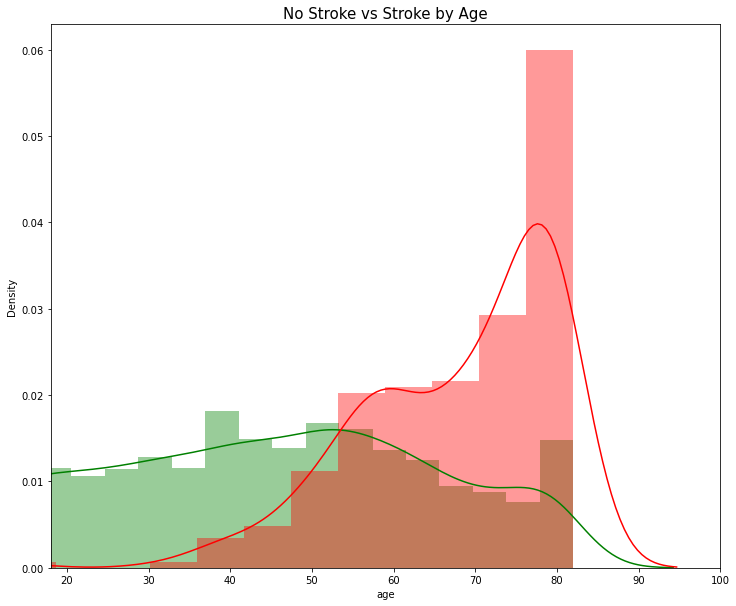

In [34]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["age"], color='green')
sns.distplot(df[df['stroke'] == 1]["age"], color='red')

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()


##Visualization on gender about stroke status

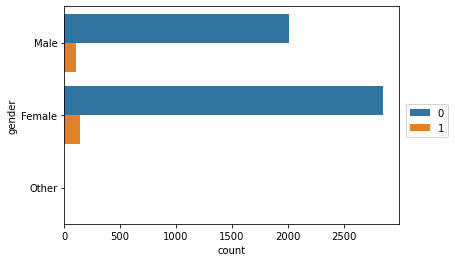

In [35]:
sns.countplot(y='gender', data=df, hue='stroke',);
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

In [36]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

it seems that there is only 1 value of other in gender column I will drop it

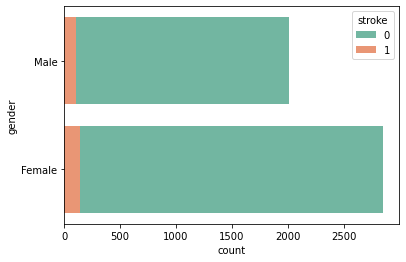

In [37]:
df.drop(df.loc[df['gender']=='Other'].index, inplace=True)
sns.countplot(y='gender', data=df, hue='stroke',dodge=False,palette='Set2');

 females are more than males we don't have much strokes in our data here that's a problem for the machine learning part as we don't need our model to overfit on non strokes

0    4860
1     249
Name: stroke, dtype: int64

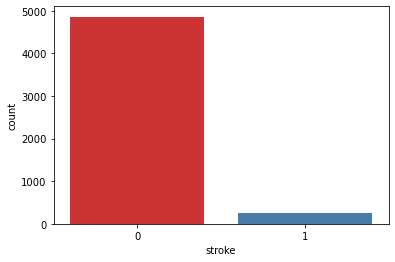

In [38]:
sns.countplot(x='stroke', data=df,dodge=False,palette='Set1')
df.stroke.value_counts()

##Line plot between age and bmi by gender

<AxesSubplot:xlabel='age', ylabel='bmi'>

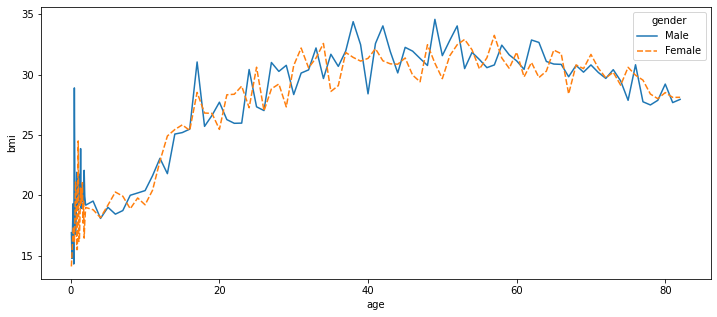

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="age", y="bmi", hue='gender', ci=None,style='gender')

<AxesSubplot:xlabel='age', ylabel='bmi'>

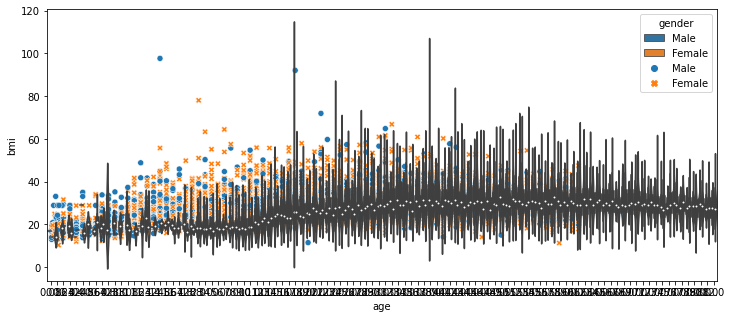

In [40]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x="age", y="bmi", hue='gender', ci=None,style='gender')
sns.violinplot(data=df, x="age", y="bmi", hue='gender', ci=None,style='gender',)

<AxesSubplot:xlabel='age', ylabel='work_type'>

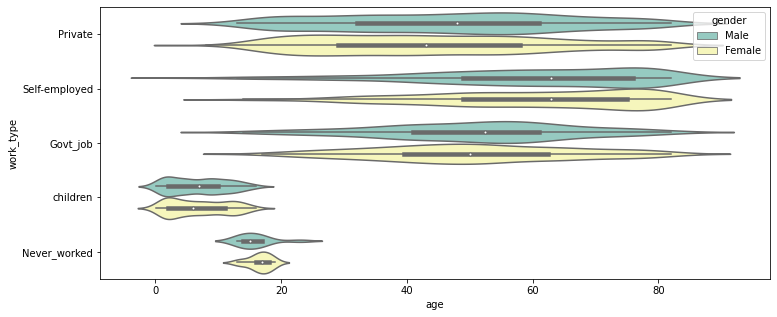

In [41]:
plt.figure(figsize=(12,5))
sns.violinplot(data=df, x="age", y="work_type", hue='gender', ci=None,style='gender',palette='Set3')

<AxesSubplot:xlabel='age', ylabel='work_type'>

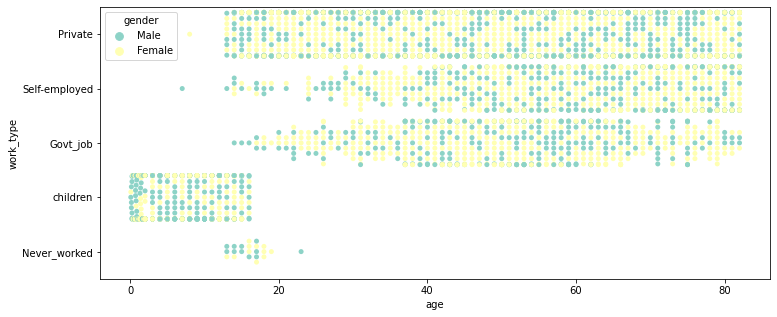

In [42]:
plt.figure(figsize=(12,5))
sns.swarmplot(data=df, x="age", y="work_type", hue='gender',palette='Set3')

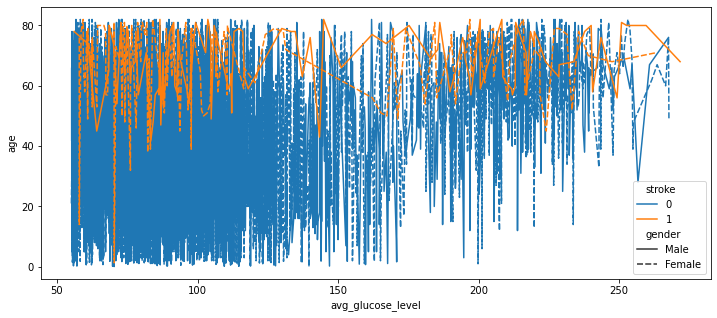

In [43]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, y="age", x="avg_glucose_level", hue='stroke', ci=None,style='gender');

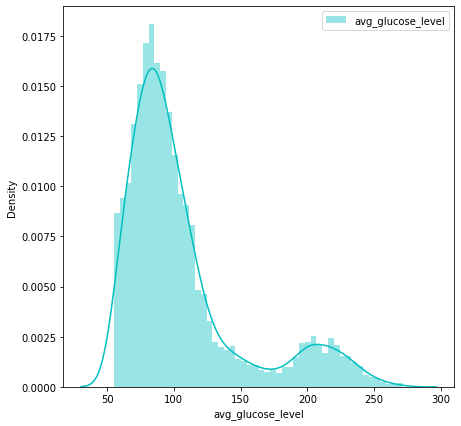

In [44]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.avg_glucose_level, color="c", label="avg_glucose_level", kde= True)
plt.legend();

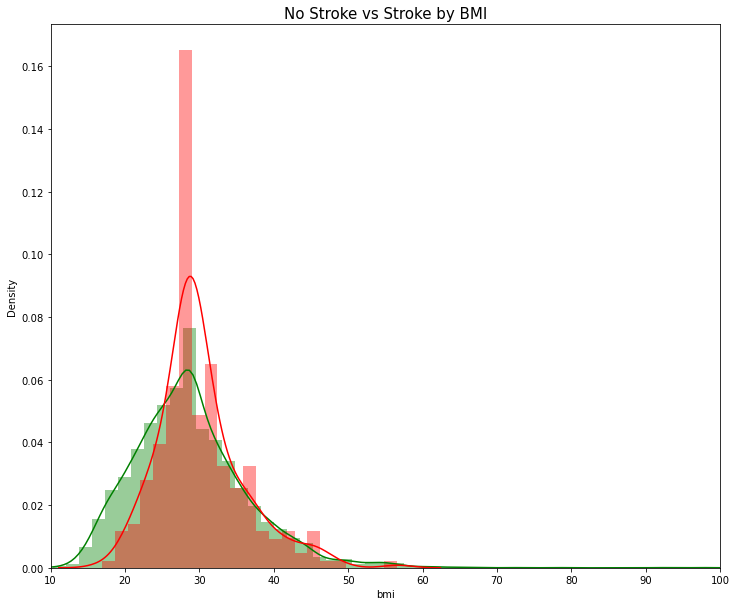

In [45]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green')
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') 

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

In [46]:
dfs=df.sample(10)

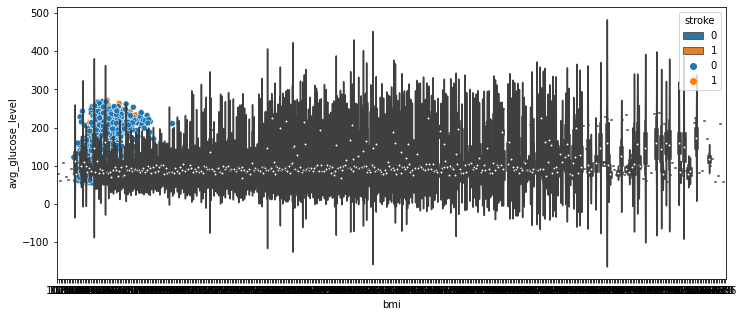

In [23]:
plt.figure(figsize=(12,5))
sns.scatterplot(y='avg_glucose_level', x='bmi', hue='stroke', data=df);
sns.violinplot(y='avg_glucose_level', x='bmi', hue='stroke', data=df);

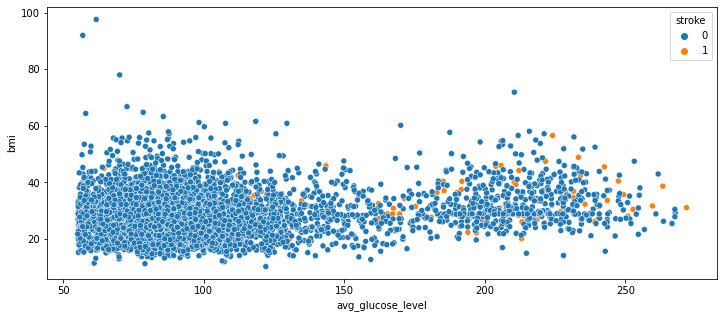

In [47]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df);

<AxesSubplot:xlabel='count', ylabel='smoking_status'>

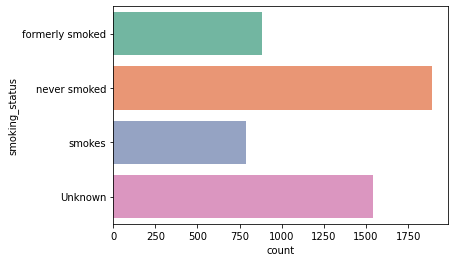

In [48]:
sns.countplot(y='smoking_status', data=df,palette='Set2')

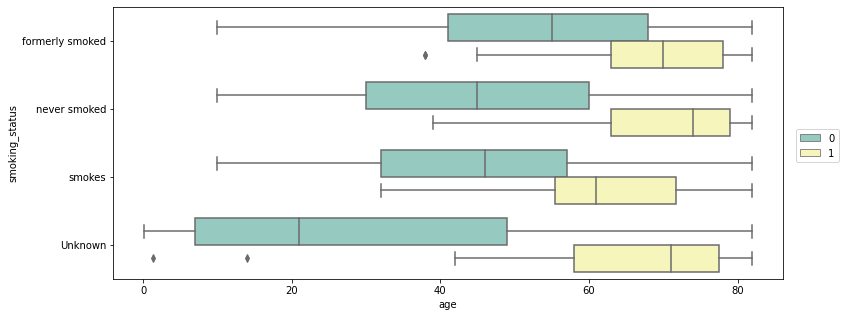

In [49]:
plt.figure(figsize=(12,5))
sns.boxplot(x='age', y='smoking_status',hue='stroke' ,data=df,palette='Set3')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

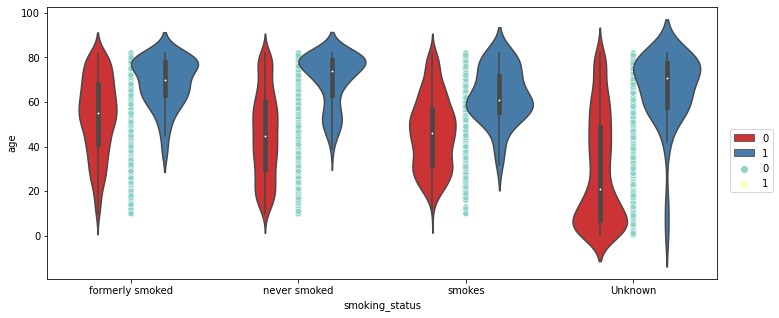

In [50]:
plt.figure(figsize=(12,5))
sns.scatterplot(y='age', x='smoking_status',hue='stroke' ,data=df,palette='Set3')
sns.violinplot(y='age', x='smoking_status',hue='stroke' ,data=df,palette='Set1')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

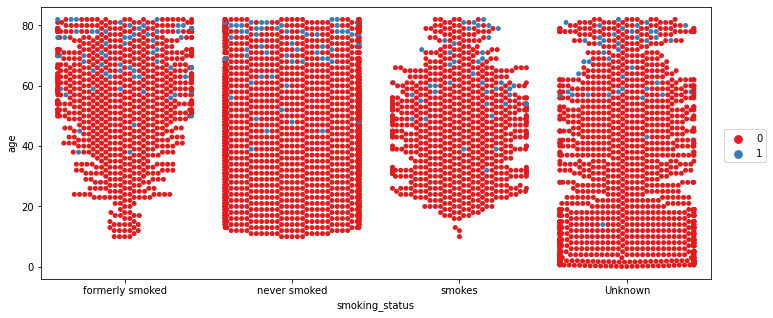

In [51]:
plt.figure(figsize=(12,5))

sns.swarmplot(y='age', x='smoking_status',hue='stroke' ,data=df,palette='Set1')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

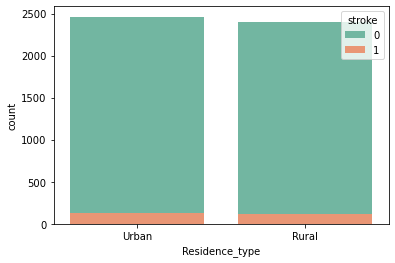

In [52]:
sns.countplot(x='Residence_type', hue='stroke', data=df,dodge=False,palette='Set2')

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

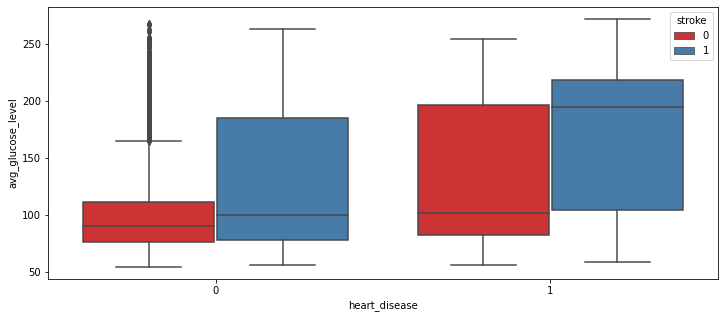

In [53]:
plt.figure(figsize=(12,5))
sns.boxplot(y='avg_glucose_level', x='heart_disease',hue='stroke' ,data=df,palette='Set1')

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

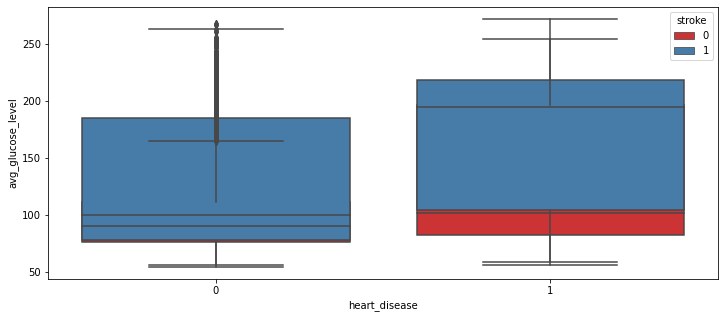

In [54]:
plt.figure(figsize=(12,5))
sns.boxplot(y='avg_glucose_level', x='heart_disease',hue='stroke' ,data=df,palette='Set1',dodge=False)

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

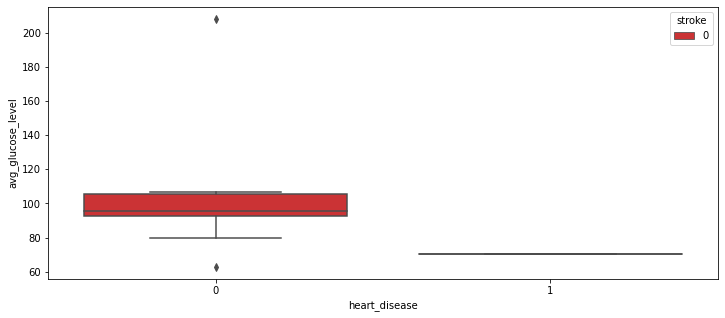

In [55]:
plt.figure(figsize=(12,5))
sns.boxplot(y='avg_glucose_level', x='heart_disease',hue='stroke' ,data=dfs,palette='Set1')

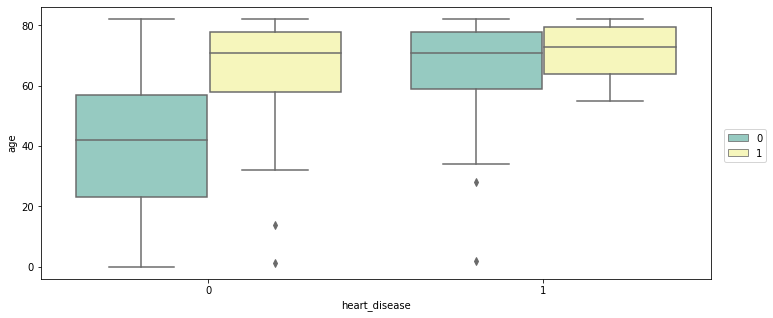

In [56]:
plt.figure(figsize=(12,5))
sns.boxplot(y='age', x='heart_disease',hue='stroke' ,data=df,palette='Set3')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

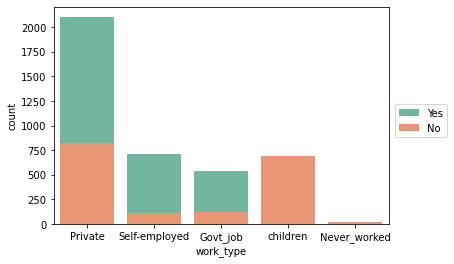

In [57]:
sns.countplot(x='work_type', hue='ever_married', data=df,palette="Set2",dodge=False)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='Count', ylabel='bmi'>

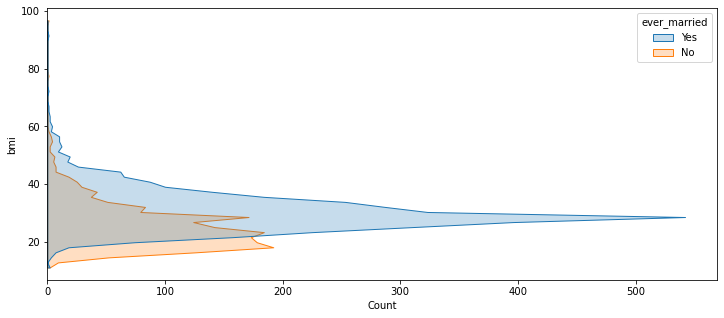

In [58]:
plt.figure(figsize=(12,5))
sns.histplot(y='bmi', hue='ever_married', data=df, bins=50,element="poly")

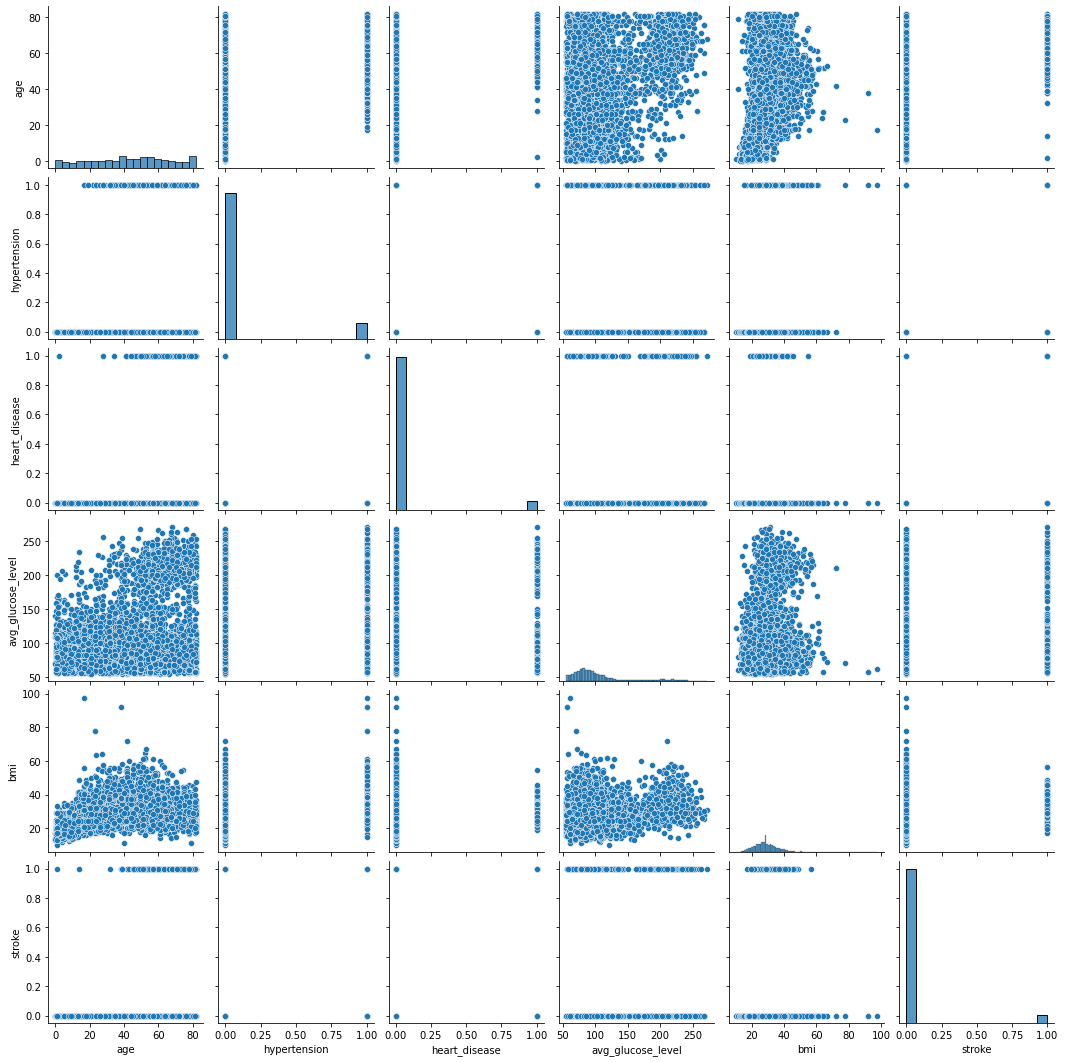

In [59]:
sns.pairplot(df, size = 2.5)

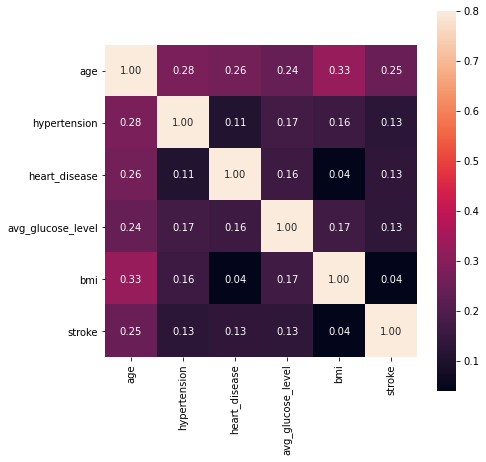

In [60]:
correlation = df.corr()
fig, axes = plt.subplots(figsize=(7, 7))
sns.heatmap(correlation, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

# Pre-processing

## Detect Outlayers

In [61]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
in_outliers = df[(df['avg_glucose_level'] < Q1 - whisker_width*IQR) | (df['avg_glucose_level'] > Q3 + whisker_width*IQR)]
in_outliers

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.300000,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.900000,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.700000,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.300000,Unknown,0


<AxesSubplot:xlabel='avg_glucose_level'>

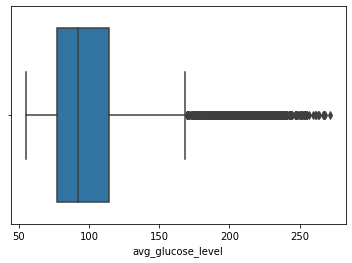

In [62]:
sns.boxplot(df['avg_glucose_level'],data = df)

In [63]:
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['avg_glucose_level'] = np.where(df['avg_glucose_level']>upper_whisker,upper_whisker,np.where(df['avg_glucose_level']<lower_whisker,lower_whisker,df['avg_glucose_level']))

In [64]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.365,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.365,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.920,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.365,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.365,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.750,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.200,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.990,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.290,25.600000,formerly smoked,0


<AxesSubplot:xlabel='avg_glucose_level'>

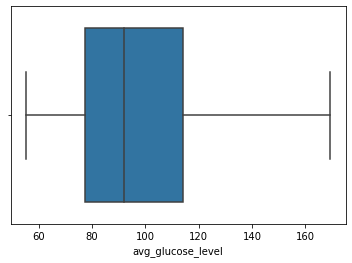

In [65]:
sns.boxplot(df['avg_glucose_level'],data = df)

## Splitting dataset into 2 datset

In [66]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [67]:
x

array([['Male', 67.0, 0, ..., 169.365, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 169.365, 28.893236911794673,
        'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [68]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## One Hot Encoding

In [69]:
ce=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,4,6,5,9])],remainder='passthrough')
x=np.array(ce.fit_transform(x))

In [70]:
x

array([[0.0, 1.0, 0.0, ..., 1, 169.365, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 169.365, 28.893236911794673],
       [0.0, 1.0, 0.0, ..., 1, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 0, 85.28, 26.2]], dtype=object)

## Standard Scaler

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x[:,3:]=sc.fit_transform(x[:,3:])


In [72]:
x

array([[0.0, 1.0, 0.0, ..., 4.184599092531789, 2.058819049787146,
        1.001040659829534],
       [1.0, 0.0, 0.0, ..., -0.23897151862999663, 2.058819049787146,
        -0.00016511125625657495],
       [0.0, 1.0, 0.0, ..., 4.184599092531789, 0.1484782027285262,
        0.4683989249701769],
       ...,
       [1.0, 0.0, 0.0, ..., -0.23897151862999663, -0.5419483970516639,
        0.22156495027925552],
       [0.0, 1.0, 0.0, ..., -0.23897151862999663, 1.966230223170308,
        -0.4279981410126432],
       [1.0, 0.0, 0.0, ..., -0.23897151862999663, -0.4729960676361977,
        -0.35005057005761564]], dtype=object)